In [1]:
library(ggplot2); packageVersion("ggplot2")
library(tidyr)
library(dplyr)
library(vegan); packageVersion("vegan")
#library(scales)
library(repr)
#library(reshape2)
library(viridis)

[1] ‘3.2.1’


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


[1] ‘2.5.6’

Loading required package: viridisLite


In [25]:
dist <- read.table('~/data/awtp2_metagenomics/awtp2_mash_dist.txt', sep='\t',
                   col.names = c('query', 'ref', 'distance', 'pval', 'matching_hashes'))

dist$distance <- as.numeric(dist$distance)

metadata <- read.table('~/data/awtp2_metagenomics/metagenomics_sample_table.tsv', sep='\t', header = TRUE)
# get a lookup of sample_id to sample_code:

id2code <- metadata[,c('sample_id', 'sample_code_partial')]

head(dist)
head(id2code)

query,ref,distance,pval,matching_hashes
<fct>,<fct>,<dbl>,<dbl>,<fct>
KNLK_11,KNLK_11,0.0000000,0.00000e+00,10000/10000
KNLK_13,KNLK_11,0.1912090,8.01352e-143,91/10000
KNLK_16,KNLK_11,0.1447690,0.00000e+00,245/10000
KNLK_23,KNLK_11,0.1938770,9.28982e-137,86/10000
KNLK_28,KNLK_11,0.1528430,0.00000e+00,206/10000
KNLK_32,KNLK_11,0.0371254,0.00000e+00,2975/10000


sample_id,sample_code_partial
<fct>,<fct>
KNLK_1,AWTP_2_RO2_biofilm_control_1
KNLK_10,DWDS_F_282B_bulk_1
KNLK_11,AWTP_2_BAC_bulk_5
KNLK_12,SDS_F_3_bulk_3
KNLK_13,AWTP_2_RO2_biofilm_sep_2
KNLK_14,DWDS_F_utility_bulk_9


In [26]:
# get sample names for plotting
df <- merge(dist, id2code, by.x='query', by.y='sample_id')
df <- merge(df, id2code, by.x='ref', by.y='sample_id')
df <- df[order(df$sample_code_partial.x, df$sample_code_partial.y),] # sort df

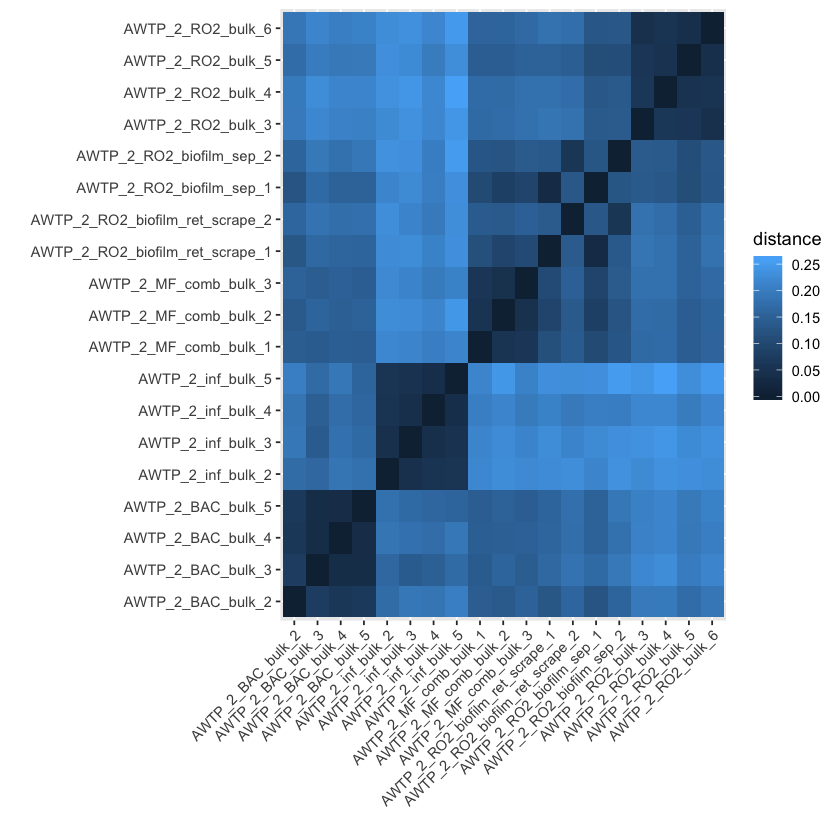

In [36]:
ggplot(df, aes(x=sample_code_partial.x, y=sample_code_partial.y))+
    geom_tile(aes(fill=distance))+
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))+
    xlab('') + 
    ylab('')
ggsave('~/data/awtp2_metagenomics/mash_dist_heatmap.pdf', device="pdf", width=7, height=5.5)